In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, r2_score
from sklearn import metrics
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [2]:
# Import the data.
df = pd.read_csv("creditcard.csv")

# Ensure the data loaded in properly.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checking the shape of the data set.
df.shape

(284807, 31)

In [4]:
# Get counts of the fraud and non-fraud cases.
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
# Code maked as comments to save space on the paper.
# Using fig and axs set up the dimenstions of the subplots.
#fig, axs = plt.subplots(len(df.columns), 1, figsize = (8, 40))
# Loop through the data to plot a histogram.
# Enumerate keeps track of the i value.
#for i, ax in enumerate(axs):
    #ax.hist(df.iloc[:,i])
    #ax.set_title(df.columns[i].title() + ' Histogram', fontsize = 12,fontweight= "bold")
# Tight layout prints the plots close together.
#plt.tight_layout()
# Use show to display the plots.
#plt.show()

In [6]:
# Check for any NA values.
df.isna().sum().sum()

0

In [7]:
# Seperate the fraud and non fraud transactions.

nonFraud = df[df.Class==0]
fraud = df[df.Class==1]

In [8]:
# Compare the statistics for both transaction types.
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [9]:
# build a dataset containing silimlar ditributions of the non-fraud and fraud transactions.

np.random.seed(6)
nonFraud_sample = nonFraud.sample(n=492)

In [10]:
# concatenate the sample df and the fraud df.

new_DF = pd.concat([nonFraud_sample, fraud], axis=0)

In [11]:
# Check the value counts of the new dataframe.
new_DF["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [12]:
# Make sure the mean of class is simialr to the original df.
new_DF.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94148.357724,-0.102618,-0.020529,-0.080178,-0.058466,0.047008,0.041238,-0.035174,-0.059097,0.098234,...,0.028975,0.023641,0.042368,0.022010,-0.001911,-0.025868,0.027440,0.019331,-0.030460,91.196443
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
# Make a correlation matrix with the dataframe.
matrix = df.corr().abs()
# Save only the values above the diagonal to a variable.
upper = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(np.bool_))
# Loop through the columns to remove columns with coorelations above 0.9.
toRemove = [column for column in upper.columns if any (upper[column]> 0.9)]
# Print out the columns to remove.
print(toRemove)

[]


# Building and evaluating models

In [14]:
# Assign the regression function to a variable.
logr = LogisticRegression()
scaler = StandardScaler()

In [15]:
# The target values are in Class.
target = 'Class'
# The features are the remaining columns minus Class.
features = new_DF.drop(target, axis=1)
features = scaler.fit_transform(features) 
#Split the data into testing and training sets.
X_train, X_test, y_train, y_test = train_test_split(features, new_DF[target],test_size=0.2, random_state = 32)

In [16]:
# Fit the training data to make the model.
logr.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Get Predictions.
prediction = logr.predict(X_test)

In [18]:
# Test Accuracy.
X_train_pred = logr.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, y_train)*100
accuracy = accuracy_score(y_test, prediction)*100
print('The accuracy on training data:', training_accuracy, '%')
print('The accuracy on testing data:', accuracy, '%')

The accuracy on training data: 94.66327827191868 %
The accuracy on testing data: 95.43147208121827 %


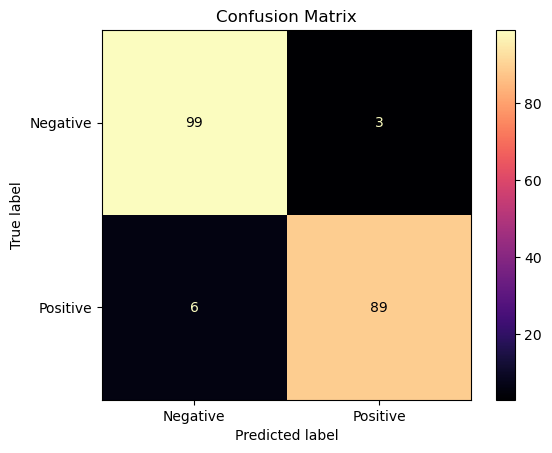

In [19]:
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
# Set up the confusion matrix using Sklearn confusion matrix display.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['Negative','Positive'])
# Plot can be used to set up the matrix.
cm_display.plot(cmap='magma')
# Changes the outside of the matrix can be done through pyplot.
plt.title('Confusion Matrix')
plt.show()

In [22]:
r2 = r2_score(y_test, prediction)
print("The r2 score of the model is: ", r2)

The r2 score of the model is:  0.8170278637770898


In [23]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       102
           1       0.97      0.94      0.95        95

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



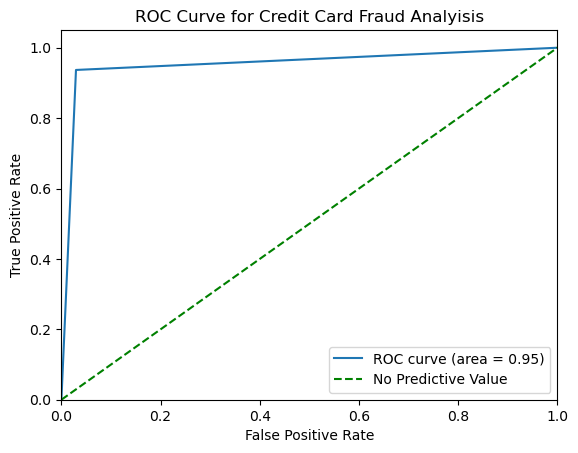

In [24]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# Calculate the Area under curve(AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'g--', label='No Predictive Value')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Card Fraud Analyisis')
plt.legend()
plt.show()

In [25]:
# Make a new data frame for the features.
featureData = df.drop('Class', axis=1)

# Obtain the column naes from the data frame.
names = featureData.columns

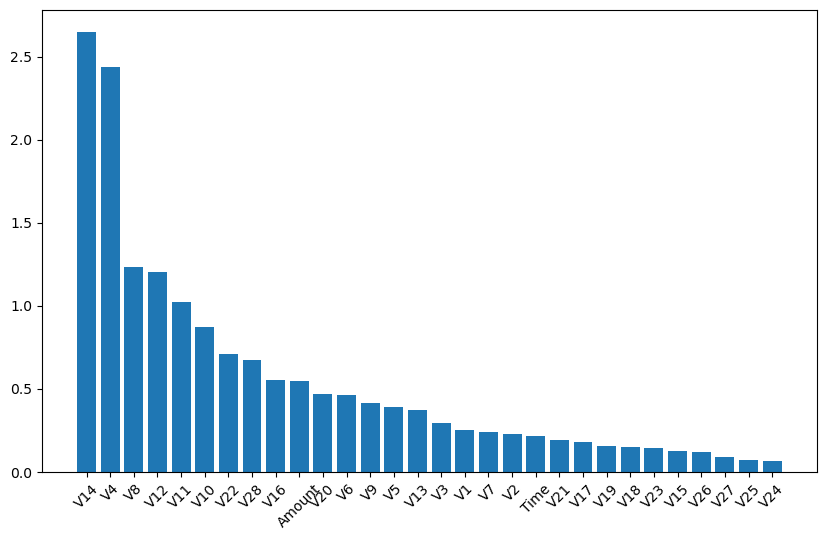

In [26]:
# Calculate the feature importance.
importance = abs(logr.coef_[0])

# Build the feature's importance data frame.
data = list(zip(names, importance))
new_df = pd.DataFrame(data, columns =['Feature', 'Importance']).sort_values(by = "Importance", ascending = False)

# Plot the features importance.
plt.figure(figsize=(10, 6))
plt.bar(new_df["Feature"], new_df["Importance"])
plt.xticks(rotation=45)
plt.show()

## Random Forest Model

In [27]:
# Assign the random forrest function to a variable.
randomforest = RandomForestClassifier(random_state=20, n_jobs=-1)

In [28]:
# Make the model with the training data.
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=20)

In [29]:
# Get predictions.
prediction = randomforest.predict(X_test)

In [30]:
# Check accuracy.
accuracy = accuracy_score(y_test, prediction)*100
print('The accuracy is:', accuracy, '%')

The accuracy is: 93.90862944162437 %


In [31]:
r2 = r2_score(y_test, prediction)
print("The r2 score of the model is: ", r2)

The r2 score of the model is:  0.7560371517027864


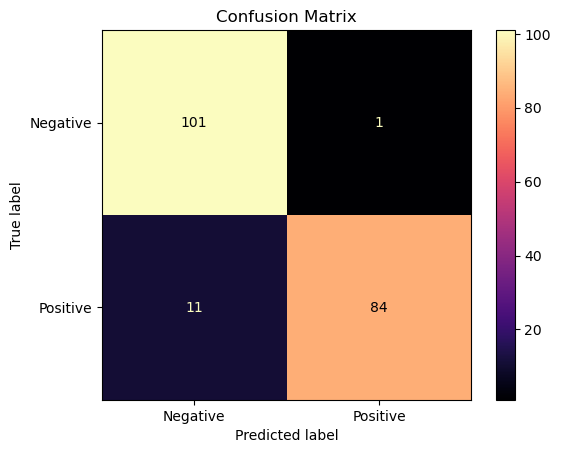

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
# Set up the confusion matrix using Sklearn confusion matrix display.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
display_labels = ['Negative','Positive'])
# Plot can be used to set up the matrix.
cm_display.plot(cmap='magma')
# Changes f the outside of the matrix can be done through pyplot.
plt.title('Confusion Matrix')
plt.show()

In [33]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       102
           1       0.99      0.88      0.93        95

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



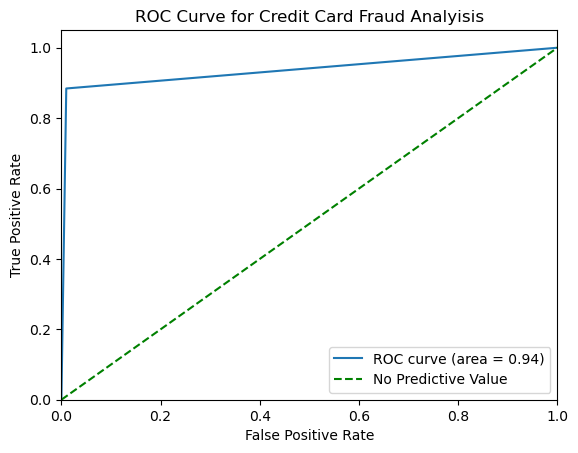

In [34]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)
# Calculate the Area under curve(AUC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'g--', label='No Predictive Value')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Card Fraud Analyisis')
plt.legend()

# Adding unseen data to check for overfitting

In [35]:
new_data = pd.read_csv("creditcard_2023.csv")
new_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [36]:
# The target values are in Class.
target = 'Class'
# The features are the remaining columns minus Class.
features = new_data.drop(target, axis=1)
features = scaler.fit_transform(features) 
#Split the data into testing and training sets.
X_train, X_test, y_train, y_test = train_test_split(features, new_data[target],test_size=0.2, random_state = 32)

In [37]:
prediction = logr.predict(X_test)

In [38]:
# Check accuracy.
accuracy = accuracy_score(y_test, prediction)*100
print('The accuracy is:', accuracy, '%')

The accuracy is: 94.38299069693825 %


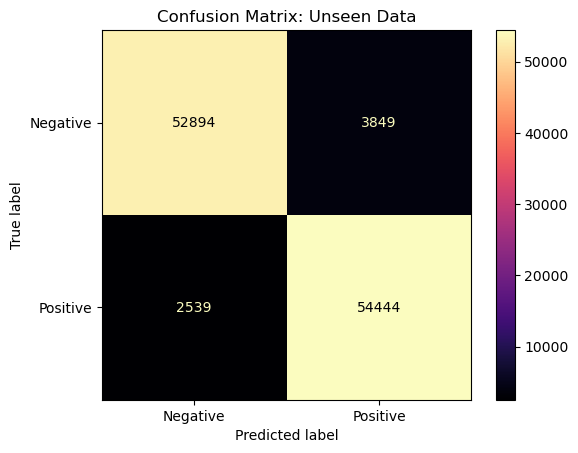

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, prediction)
# Set up the confusion matrix using Sklearn confusion matrix display.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
display_labels = ['Negative','Positive'])
# Plot can be used to set up the matrix.
cm_display.plot(cmap='magma')
# Changes f the outside of the matrix can be done through pyplot.
plt.title('Confusion Matrix: Unseen Data')
plt.show()

In [40]:
r2 = r2_score(y_test, prediction)
print("The r2 score of the model is: ", r2)

The r2 score of the model is:  0.7753186272555848
